# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [416]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_f20/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [488]:
cd /home/aidar/Загрузки


/home/aidar/Загрузки


In [489]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [490]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,247,91,39,83,176,59,7,169,39,20,132,190,426,142,67,0,24,192,199
1,300,106,53,98,193,60,10,215,31,24,169,224,681,218,73,8,21,188,197
2,732,85,45,73,167,69,8,143,46,18,148,173,307,176,71,2,0,190,199
3,574,104,55,105,216,68,11,205,32,23,169,221,623,216,71,9,18,189,196
4,749,93,51,90,209,69,8,183,36,22,156,211,506,230,70,6,1,189,196
5,470,91,44,66,151,63,7,137,48,18,146,166,280,167,72,1,9,188,194
6,136,86,48,75,136,58,10,161,43,20,163,170,371,185,75,3,1,183,192
7,754,91,41,64,148,61,8,129,51,18,142,161,249,153,68,6,12,194,201
8,308,109,51,100,197,59,10,192,34,22,161,210,553,195,64,14,3,196,202
9,295,90,38,75,164,64,7,151,43,19,131,168,345,139,66,0,0,195,204


Methods `describe` and `info` deliver some useful information.

In [491]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,426.462659,93.218579,44.670310,81.315118,167.582878,61.612022,8.459016,167.258652,41.278689,20.471767,147.644809,186.938069,431.480874,173.754098,72.426230,6.307832,12.145719,188.907104,195.561020
std,244.243157,8.039112,6.167274,15.705460,32.820833,7.217472,4.124063,32.619608,7.736108,2.539761,14.535241,30.670009,172.817058,32.037495,7.436871,4.820685,8.448032,6.258755,7.491748
min,0.000000,73.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,217.000000,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.000000,34.000000,19.000000,136.000000,167.000000,317.000000,149.000000,67.000000,2.000000,5.000000,184.000000,191.000000
50%,430.000000,92.000000,44.000000,78.000000,165.000000,61.000000,8.000000,156.000000,43.000000,20.000000,145.000000,177.000000,361.000000,173.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,629.000000,99.000000,49.000000,96.000000,193.000000,65.000000,10.000000,195.000000,46.000000,22.000000,158.000000,214.000000,573.000000,197.000000,75.000000,9.000000,18.000000,193.000000,201.000000
max,844.000000,117.000000,59.000000,112.000000,333.000000,138.000000,52.000000,265.000000,61.000000,29.000000,186.000000,320.000000,1018.000000,264.000000,135.000000,22.000000,38.000000,206.000000,211.000000


In [492]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [493]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [494]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logistic_regression = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3,max_iter=600,
                                         random_state=42)
model = logistic_regression.fit(X_train_std,y_train)
y_pred = model.predict(X_test_std)

print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_pred, y_test)))
print('F1: {:.2f}'.format(metrics.f1_score(y_pred,y_test,average='micro')))

Accuracy: 0.76
F1: 0.76


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

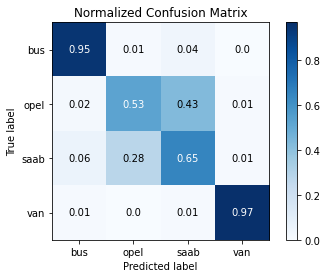

In [495]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

In [496]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead
 #pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

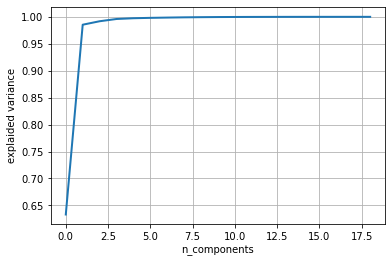

In [497]:
### YOUR CODE HERE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca=PCA()  
pca.n_components=19 # 19 так как : must be between 0 and min(n_samples, n_features)=19 далее смотрим на график
pca_data=pca.fit_transform(X_train)
# для более точного нахождения границы (когда кривая очень близка к единице n_components можно уменьшить и видно что при значении 2 уже >0.98)

percentage_var_explained = pca.explained_variance_ratio_;  
cum_var_explained=np.cumsum(percentage_var_explained)


plt.figure(1,figsize=(6,4))
plt.clf()  
plt.plot(cum_var_explained,linewidth=2)  
plt.axis('tight')  
plt.grid() 
plt.xlabel('n_components') 
plt.ylabel('explaided variance')  
plt.show()

Перед построением модели всегда важно привести данные в один и тот же масштаб, иначе в результатах модели будет преобладать объект с большей дисперсией. Поскольку PCA определяет компоненты на основе дисперсии, перед применением PCA необходимо стандартизировать функции.

Можем сами задать значение дисперсии покрывающую определенный процент (возьму 95 например) и передам его в качестве входного параметра

In [498]:
pca=PCA(.95)  
pca.fit(X_train)  
print('Number of components to explain 95% Variance is',pca.n_components_)

Number of components to explain 95% Variance is 2


значит 2 и берем в кач-ве параметра

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [499]:
### YOUR CODE HERE
pca=PCA(n_components=2) 

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [500]:

pipe_lr = Pipeline([#('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', logistic_regression)])
pipe_lr.fit(X_train_pca, y_train)
Pipeline(steps=[#('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', logistic_regression)])
y_pred=pipe_lr.predict(X_test_pca)

In [501]:
model.fit(X_train_pca,y_train)
y_pred=model.predict(X_test_pca)

In [502]:
print('Accuracy:',format(metrics.accuracy_score(y_test,y_pred)))
print('F1 score:',format(metrics.f1_score(y_test,y_pred,average="micro"))) 


Accuracy: 0.3939393939393939
F1 score: 0.3939393939393939


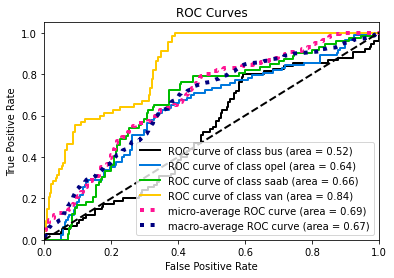

In [503]:
y_probas = pipe_lr.predict_proba(X_test_pca)
skplt.metrics.plot_roc(y_test, y_probas)

plt.show()


#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [504]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42,max_depth=1000)
mode=clf.fit(X_train_std,y_train)
y_prede=mod.predict(X_test_std)
print('Accuracy:',format(metrics.accuracy_score(y_test,y_prede)))
print('F1 score:',format(metrics.f1_score(y_test,y_prede,average="micro"))) 

# YOUR CODE HERE

Accuracy: 0.9259259259259259
F1 score: 0.9259259259259259


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [505]:
# YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score




In [506]:
N_estim=[]
for i in range (2,101,5):
    N_estim.append(i)
N_estim.append(100)
ACCURACY_FOR_dtc=[]
ACCURACY_FOR_log=[]

for i in (N_estim):
    
    dtc = DecisionTreeClassifier(random_state=42,max_depth=1000)
    mod = BaggingClassifier(base_estimator=dtc, n_estimators=i,random_state=42)
    log = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3,max_iter=500)
    mod_log= BaggingClassifier(base_estimator=log)

    result_mod=mod.fit(X_train_std,y_train)
    result_log=mod_log.fit(X_train_std,y_train)

   
    ACCURACY_FOR_dtc.append(cross_val_score(mod,X_train_std,y_train,cv=5).mean())
    ACCURACY_FOR_log.append(cross_val_score(mod_log,X_train_std,y_train,cv=5).mean())
 

/home/aidar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/aidar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/aidar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/aidar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/aidar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was

In [507]:
N_estim=np.array(N_estim)
ACCURACY_FOR_dtc=np.array(ACCURACY_FOR_dtc)

Text(0, 0.5, 'Accuracy')

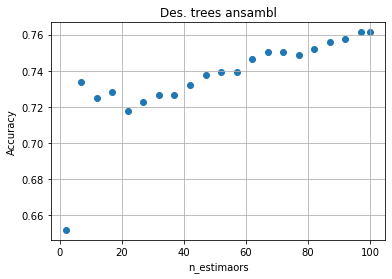

In [508]:
plt.scatter(N_estim,ACCURACY_FOR_dtc)  
plt.axis('tight')  
plt.title("Des. trees ansambl")
plt.grid()
plt.xlabel('n_estimaors') 
plt.ylabel('Accuracy') 

Text(0, 0.5, 'Accuracy')

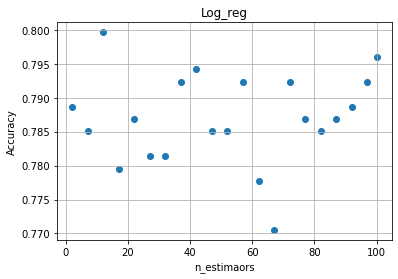

In [509]:
plt.scatter(N_estim,ACCURACY_FOR_log)  
plt.axis('tight')  
plt.title("Log_reg")
plt.grid()
plt.xlabel('n_estimaors') 
plt.ylabel('Accuracy') 

#### видим, что оптимальные n_estim различны для разных ансамлей - (log_reg 18, des. trees 100)

### 2.7. Random Forest
Now we will work with the Random Forest (its sklearn implementation).

Plot f1 and accuracy scores plots w.r.t. the number of trees in Random Forest.
What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

Text(0, 0.5, 'Accuracy')

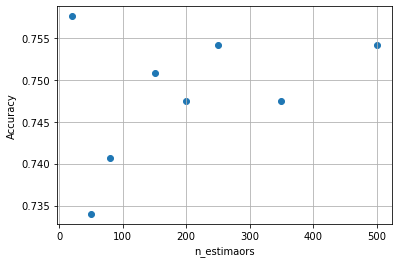

In [510]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
n_estim=np.array([20,50,80,150,200,250,350,500])
ACCURACY=[]
F1=[]
for i in  (n_estim):
    random_forest = RandomForestClassifier(n_estimators=i, random_state=42)
    rf_model = random_forest.fit(X_train_std, y_train)
    predictions = rf_model.predict(X_test_std)
    ACCURACY.append(metrics.accuracy_score(y_test, predictions))
    F1.append(metrics.f1_score(y_test, predictions,average='micro'))
plt.scatter(n_estim,ACCURACY)  
plt.axis('tight')  
plt.grid() 
plt.xlabel('n_estimaors') 
plt.ylabel('Accuracy')  

Text(0, 0.5, 'F1')

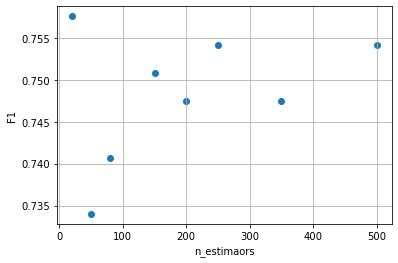

In [511]:
plt.scatter(n_estim,F1)  
plt.axis('tight')  
plt.grid() 
plt.xlabel('n_estimaors') 
plt.ylabel('F1') 

Видим, что оптимальное кол-во от 350 деревьев

### 2.8. Learning curve Your goal is to estimate, how does the model behaviour change with the increase of the train dataset size.

Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

Build a plot of accuracy and f1 scores on test part, varying the train dataset size (so the axes will be score - dataset size.

Analyse the final plot. Can you make any conlusions using it?

In [512]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import learning_curve
train_sizes=[]
for i in range (1,11):
    train_sizes.append(30*i)


In [522]:
train_sizes, train_scores, valid_scores = learning_curve(
   logistic_regression, X_train_std, y_train, train_sizes=train_sizes, cv=5)

In [523]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)

Text(0.5, 1.0, 'log reg ')

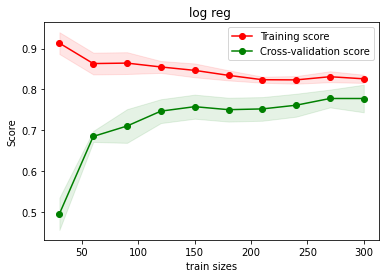

In [524]:
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel('train sizes') 
plt.ylabel('Score')
plt.title("log reg ")

Text(0.5, 1.0, ' des. trees ')

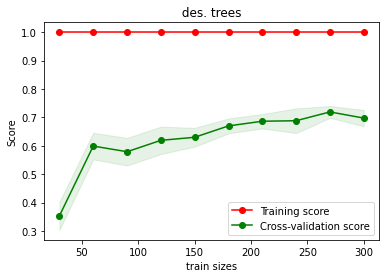

In [521]:
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel('train sizes') 
plt.ylabel('Score')
plt.title(" des. trees ")

Text(0.5, 1.0, 'Random Forest')

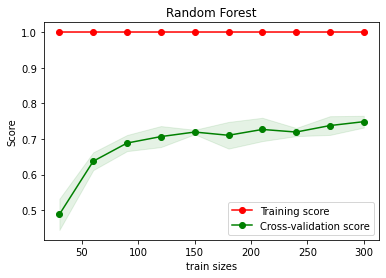

In [517]:
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel('train sizes') 
plt.ylabel('Score')
plt.title("Random Forest")

По графикам видим,  что с увелечением размера выборки Score растет - а для лог. регр. разница между train и test уменьшается